# Исследование успешности игр

## Описание исследования

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Доступны синтетические исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности - это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Цель исследования

Выявить определяющие успешность игры закономерности 


### Изучение исходных данных

Доступны данные до 2016 года (за 2016 год - неполные).

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
# Настраиваем окружение:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Установим необходимые параметры отображения
pd.set_option('display.max_columns', 0)
plt.rcParams['figure.figsize'] = [16, 7]
plt.rcParams['axes.grid'] = True

In [3]:
data = pd.read_csv('datasets/games.csv')

In [4]:
display(data)
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Согласно документации:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Заметны явные пропуски в нескольких столбцах (главным образом Year_of_Release, Critic_Score, User_Score и Rating), а также необходимость изменить тип данных в столбцах Year_of_Release и User_Score.

In [5]:
# Приведём наименования столбцов к нижнему регистру:
data.columns = data.columns.str.lower()

In [6]:
# Рассмотрими уникальные значения столбца с рейтингом:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Согласно официальным данным (https://www.esrb.org/ratings-guide/):
- E (Everyone) - подходит всем возрастам
- E10+ (Everyone 10+) - для возрастов от 10 лет
- T (Teen) - для возрастов от 13 лет
- M (Mature) - для возрастов от 17 лет
- AO (Adults Only) - для взрослых, от 18 лет
- RP (Rating Pending) - рейтинг ещё не выставлен
- K-A (Kids to Adults) - устаревший рейтинг (1994-1998), был замещён на E
- EC (Early Childhood) - устаревший рейтинг (1994-2018) для игр, рассчитанных на дошкольную аудиторию

Данные предварительно изучены, можно переходить к предобработке

## Предобработка данных

### Замена типов данных

In [7]:
# Преобразуем формат столбца year_of_release для удобства в целочисленный формат:
data.year_of_release = data.year_of_release.astype('Int64')

In [8]:
# Рассмотрим уникальные значения в столбце user_score на выявление неявных пропусков и ошибок:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score встречается значение tbd, что расшифровывается применительно к рейтингам/выставлениям оценок как _To Be Determined_, т.е. - оценка ещё не выставлена. Присвоим таким данным пустые значения, после чего изменим тип столбца:

In [9]:
data.user_score = data.user_score.replace('tbd', None)
data.user_score = data.user_score.astype(float)

### Обработка пропусков и ошибок

Всего лишь два пропуска в столбцах _name_ и _genre_, изучим их:

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видно, это одни и те же строки. Скорее всего, произошла ошибка при выгрузке данных. Поскольку строк всего две, мы можем спокойно их опустить.

In [12]:
data = data.dropna(subset=['name']).reset_index(drop=True)

In [13]:
# Проверим столбец platform на наличие неявных пропусков/дубликатов:
data.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В столбце platform ошибок не выявлено

#### Столбец year_of_release

Рассмотрим пропуски в столбце _year_of_release_, образованные, вероятнее всего, в результате ошибок в выгрузке данных/отсутствии данных о годе выпуска игры:

In [14]:
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Часть пропусков мы можем заменить, исходя из названия игры

In [15]:
data.year_of_release.describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [16]:
# Найдём игры с годом в названии:
list_of_years = [str(x) for x in 
                 (range(
                     data.year_of_release.min(),
                     data.year_of_release.max()+1)
                 )]
games_year_in_name = []
for name in data.query('year_of_release.isna()')['name']:
    for word in name.split():
        if word in list_of_years:
            games_year_in_name.append(name)
games_year_in_name

['Madden NFL 2004',
 'FIFA Soccer 2004',
 'wwe Smackdown vs. Raw 2006',
 'NASCAR Thunder 2003',
 'Madden NFL 2002',
 'NFL GameDay 2003',
 'NBA Live 2003',
 'All-Star Baseball 2005',
 'NBA Live 2003',
 'All-Star Baseball 2005',
 'Tour de France 2011',
 'Sega Rally 2006',
 'PDC World Championship Darts 2008',
 'Football Manager 2007',
 'PDC World Championship Darts 2008']

In [17]:
data.loc[data.loc[:,'name'].isin(games_year_in_name)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
452,Madden NFL 2002,PS2,2001,Sports,2.50,0.16,0.01,0.42,94.0,7.9,E
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1103,NBA Live 2003,PS2,2002,Sports,1.25,0.15,0.03,0.22,83.0,8.3,E
1386,Madden NFL 2002,PS,2001,Sports,0.78,0.53,0.00,0.09,88.0,8.0,E
1649,NASCAR Thunder 2003,PS2,<NA>,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
1880,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
2605,FIFA Soccer 2004,XB,2003,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
3313,Madden NFL 2002,GC,2001,Sports,0.47,0.12,0.00,0.02,89.0,NaN,E


Часть из этих пропусков мы можем заполнить информацией по другим платформам 

In [18]:
data.loc[data.loc[:,'name'].isin(games_year_in_name), 'year_of_release'] = \
data.year_of_release.fillna(data.groupby('name')['year_of_release'].transform('first'))

In [19]:
# Обновим список игр с пропусками:
games_year_in_name = []
for name in data.query('year_of_release.isna()')['name']:
    for word in name.split():
        if word in list_of_years:
            games_year_in_name.append(name)
list_of_years = [int(x) for x in list_of_years]
games_year_in_name

['wwe Smackdown vs. Raw 2006',
 'NFL GameDay 2003',
 'All-Star Baseball 2005',
 'All-Star Baseball 2005',
 'Tour de France 2011',
 'Sega Rally 2006',
 'Football Manager 2007']

Учтём при заполнении остальных пропусков, что спортивные игры зачастую выпускаются в предыдущем году от того, который содержится в названии

In [20]:
for name in games_year_in_name:
    for i in data[data['name'].str.contains(name)].index:
        if data.loc[i,'genre'] == 'Sports':
            data.loc[i,'year_of_release'] = (int(name.split()[-1]) - 1)
        else:
            data.loc[i,'year_of_release'] = (int(name.split()[-1]))

К сожалению, мы не можем достоверно заполнить остальные пропуски в этом столбце, т.к. год выхода игры на разных платформах может отличаться, к примеру:

In [21]:
data.query('name == "Wheel of Fortune"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1576,Wheel of Fortune,PS,1998,Misc,0.99,0.22,0.0,0.04,NaN,NaN,NaN
2123,Wheel of Fortune,Wii,2010,Misc,0.86,0.04,0.0,0.06,NaN,7.6,E
2156,Wheel of Fortune,PS2,<NA>,Misc,0.47,0.36,0.0,0.12,NaN,NaN,E
4661,Wheel of Fortune,DS,2010,Misc,0.39,0.00,0.0,0.03,NaN,NaN,E
6669,Wheel of Fortune,N64,1997,Misc,0.20,0.05,0.0,0.00,NaN,NaN,NaN


#### Столбец rating

Можно говорить о следующих причинах, породивших пропуски в столбцах _critic_score_, _user_score_ и _rating_ (помимо ошибок в выгрузке данных): 
- Нишевые, непопулярные игры могут быть обойдены вниманием как критиков, так и игроков, и даже организации ESRB
- При перевыпуске игры на другой платформе рейтинги и оценки могут не выставляться
- Возможно, не набралось достаточное количество выставленных критиками и оценками игроков, а потому финальный рейтинг/оценка не были назначены (например, на сайте https://www.metacritic.com необходимо минимум 4 оценки критика для формирования общей оценки)

Часть пропусков в столбце _rating_ мы можем заполнить на основе данных о выпуске игры на других платформах (рейтинг в таких случаях как правило ощутимо не меняется):

In [22]:
data.rating = data.rating.fillna(data.groupby('name')['rating'].transform('first'))

#### Столбцы critic_score и user_score

Несмотря на то, что рейтинги игр могут меняться в зависимости от платформы, видится безопасным взять среднее для заполнения части пропусков в столбцах _critic_score_ и _user_score_:

In [23]:
data.user_score = data.user_score.fillna(data.groupby('name')['user_score'].transform('mean'))
data.critic_score = data.critic_score.fillna(data.groupby('name')['critic_score'].transform('mean'))

Опустим оставшиеся пропуски в столбце _year_of_release_:

In [24]:
print(f'Доля пропусков : {len(data.query("year_of_release.isna()"))/len(data):.2%}')

data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Доля пропусков : 1.52%


### Обработка дубликатов

In [25]:
# Рассмотрим и заменим устаревшие рейтинги K-A и EC в столбце с рейтингом ESRB:
print(f'Количество игр с рейтингом K-A:', len(data.query('rating=="K-A"')))
data.rating = data.rating.replace('K-A', 'E')
print(f'Количество игр с рейтингом EC:', len(data.query('rating=="EC"')))
data.rating = data.rating.replace('EC', 'E')
print(f'Количество игр с рейтингом RP:', len(data.query('rating=="RP"')))

Количество игр с рейтингом K-A: 4
Количество игр с рейтингом EC: 10
Количество игр с рейтингом RP: 1


In [26]:
# Видится целесообразным избавиться от единственного рейтинга RP в данных:
data.query('rating=="RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14057,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


Согласно официальному сайту (https://www.esrb.org/ratings/31253/Supreme+Ruler+Cold+War/), мы можем заменить рейтинг данной игры на E10+:

In [27]:
data.rating = data.rating.replace('RP', 'E10+')

In [28]:
# Проверим данные на явные дубликаты:
data.duplicated().sum()

0

### Дополнительные расчёты

In [29]:
# Посчитаем суммарные продажи во всех регионах:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ данных

### Исследование выпуска и продаж игр в разбивке по годам
Рассмотрим, как представлены продажи игр по годам:

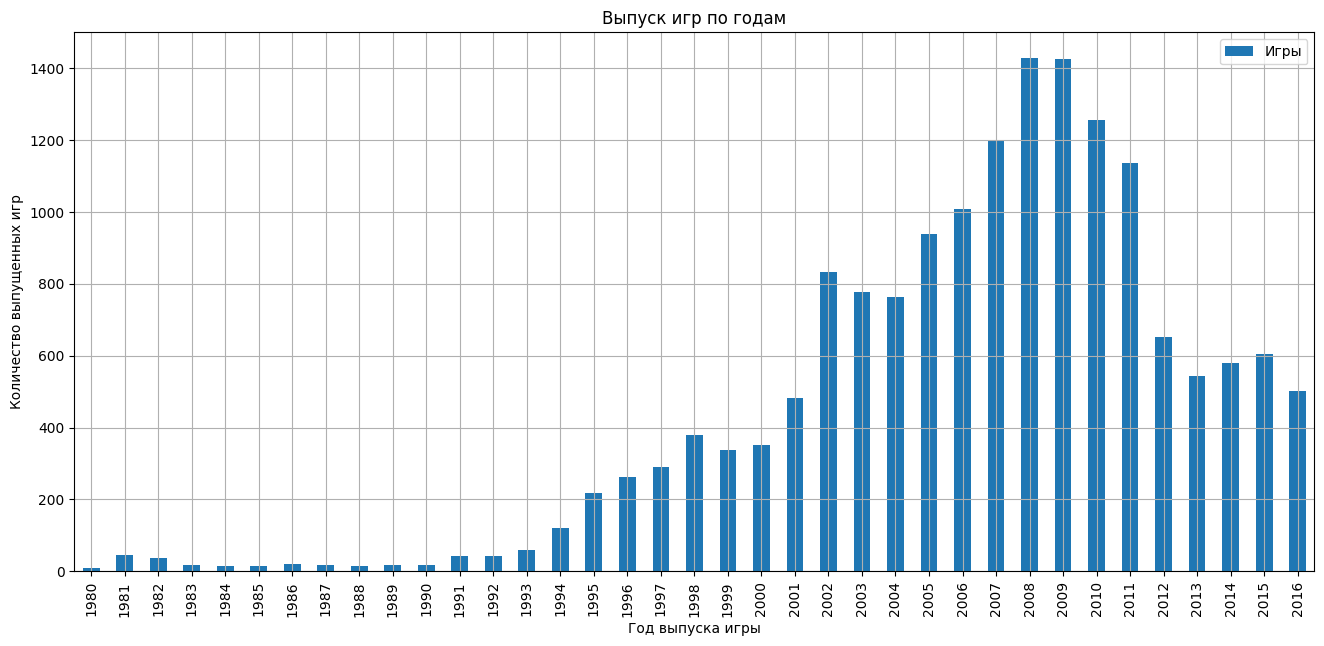

In [30]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar');
plt.title('Выпуск игр по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.legend(['Игры'])
plt.show()

Сравним долю игр до 1995 года:

In [31]:
data[data['year_of_release'] < 1995]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,None,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,None,28.31
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,None,20.62
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,None,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...
15317,Mortal Kombat,PC,1994,Fighting,0.02,0.00,0.00,0.00,85.0,8.166667,M,0.02
15456,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,None,0.02
15550,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,0.00,0.00,0.02,0.00,NaN,NaN,None,0.02
15717,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,None,0.02


In [32]:
print(f'Доля игр до 1995 года: {len(data[data["year_of_release"] < 1995])/len(data):.2%}')

Доля игр до 1995 года: 2.95%


Видится уместным опустить данные по играм до 1995 года. Поскольку их доля мала, данные сильно не исказятся:

In [33]:
data_filtered = data[data["year_of_release"] >= 1995]

Рассмотрим суммарные продажи по платформам и выберем из них те, на которых продавалось больше всего игр:

In [34]:
platforms_sales = (data_filtered.pivot_table(index='platform', values='sum_sales', aggfunc='sum') \
                   .sort_values(by='sum_sales', ascending=False))
platforms_sales.head(20)

,sum_sales
platform,
PS2,1247.28
X360,961.30
PS3,931.34
Wii,891.18
DS,802.77
PS,721.55
PS4,314.14
GBA,312.88
PSP,289.54


Примем за платформы с наибольшими суммарными продажами те, где суммарные продажи игр превышают 100 млн копий

In [35]:
best_platforms = data_filtered[data_filtered['platform'].isin(platforms_sales.query('sum_sales > 100').index)]

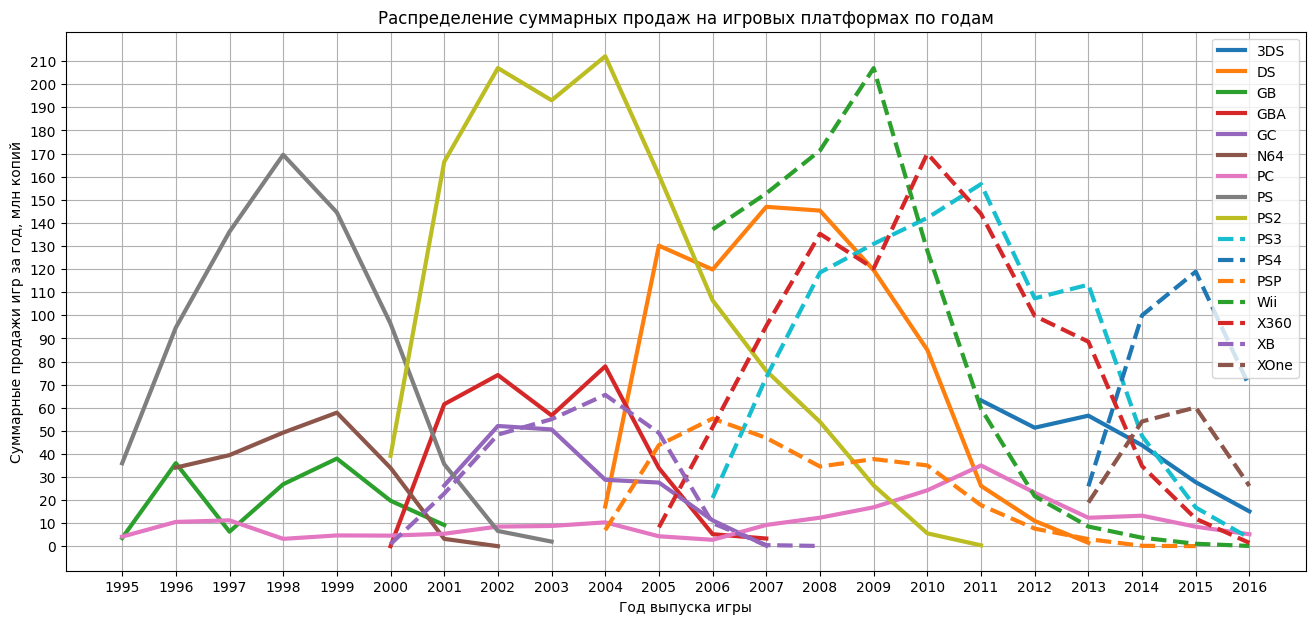

In [36]:
platform_table = best_platforms.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
plt.plot(platform_table.loc[:, :'PS2'], linewidth=3)
plt.plot(platform_table.loc[:,'PS3':], linewidth=3, linestyle='dashed')
plt.title('Распределение суммарных продаж на игровых платформах по годам')
plt.xlabel('Год выпуска игры')
plt.xticks(range(1995,2017,1))
plt.ylabel('Суммарные продажи игр за год, млн копий')
plt.yticks(range(0,220,10))
plt.legend(platform_table.columns, loc='best')
plt.show()    

In [37]:
# Вычислим среднее пребывание платформы на рынке, исключив платформы нового поколения и PC:
(best_platforms.query('platform != ["PC", "XOne", "PS4", "3DS"]').groupby('platform')['year_of_release'].max() - 
 best_platforms.query('platform != ["PC", "XOne", "PS4", "3DS"]').groupby('platform')['year_of_release'].min()).mean().round(1)

8.6

На основе графика и расчётов можно сделать вывод, что "средняя продолжительность жизни" игровой платформы составляет от 6 до 10 лет, в среднем - около восьми с половиной лет.

Выделим на основе проведённого анализа актуальный период - 5 лет с момента появления последней портативной платформы (3DS).

In [38]:
'''
Сформируем таблицу для работы с данными за актуальный период,
исключив PS2 (т.к. 2011 год - последний, в котором продавались игры на ней)
'''
data_actual = data_filtered.query('year_of_release >= 2011 and platform != "PS2"', engine='python')

### Поиск потенциально прибыльных платформ

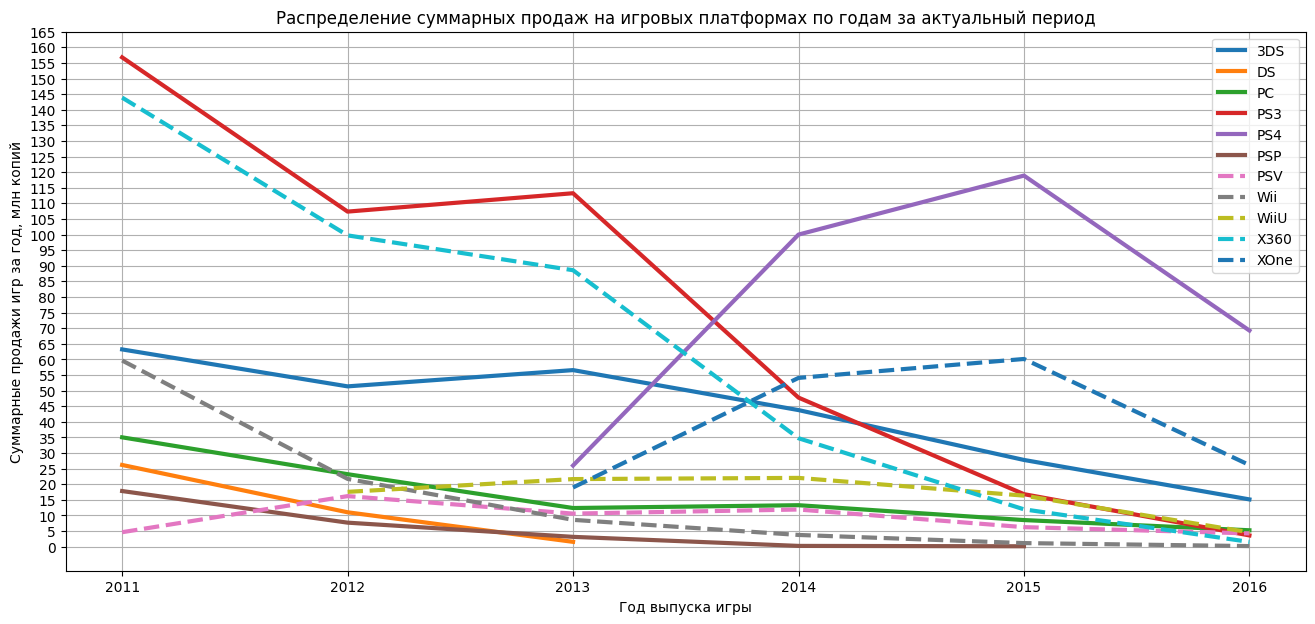

In [39]:
actual_platforms = data_actual.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
plt.plot(actual_platforms.loc[:, :'PSP'], linewidth=3)
plt.plot(actual_platforms.loc[:, 'PSV':], linewidth=3, linestyle='dashed')
plt.title('Распределение суммарных продаж на игровых платформах по годам за актуальный период')
plt.xlabel('Год выпуска игры')
plt.xticks(range(2011,2017,1))
plt.ylabel('Суммарные продажи игр за год, млн копий')
plt.yticks(range(0,170,5))
plt.legend(actual_platforms.columns, loc='best')
plt.show()    

Поскольку данные за 2016 год неполные, скорее всего это является ведущим фактором в снижении суммарных продаж игр по всем платформам в 2016 году, включая две лидирующие и растущие по продажам игр на них игровых платформ - PS4 и Xbox One. Продажи игр на других платформах стабильно падают с течением времени, но у платформы 3DS показатели продаж выделяются более высоким уровнем, чем у других.

Построим диаграммы размаха в различных приближениях для оценки разброса данных:

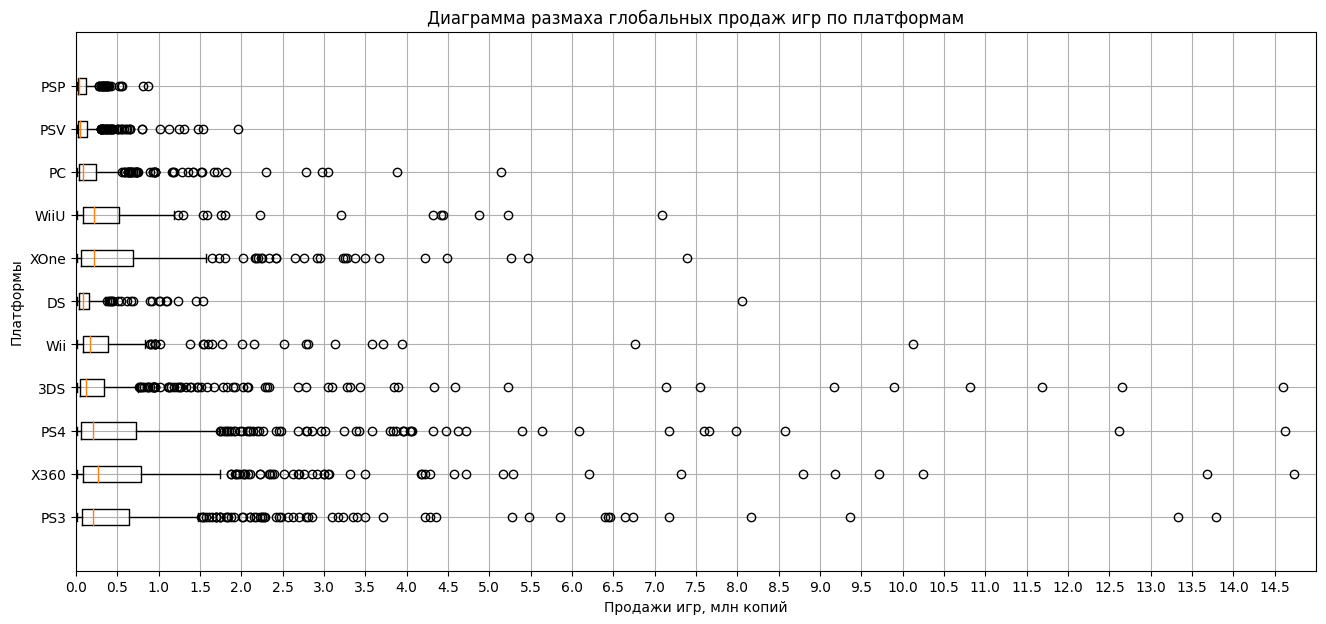

In [40]:
platform_position = 0
for platform in data_actual.platform.unique():
    plt.boxplot(data_actual[data_actual['platform']==platform]['sum_sales'], vert=False, positions=[platform_position])
    platform_position += 0.4
plt.ylabel('Платформы')
plt.yticks(np.arange(0,0.4*len(data_actual.platform.unique()),0.4),data_actual.platform.unique())
plt.xlabel('Продажи игр, млн копий')
plt.xticks(np.arange(0,15,0.5))
plt.xlim(0,15)
plt.title('Диаграмма размаха глобальных продаж игр по платформам')
plt.show()    

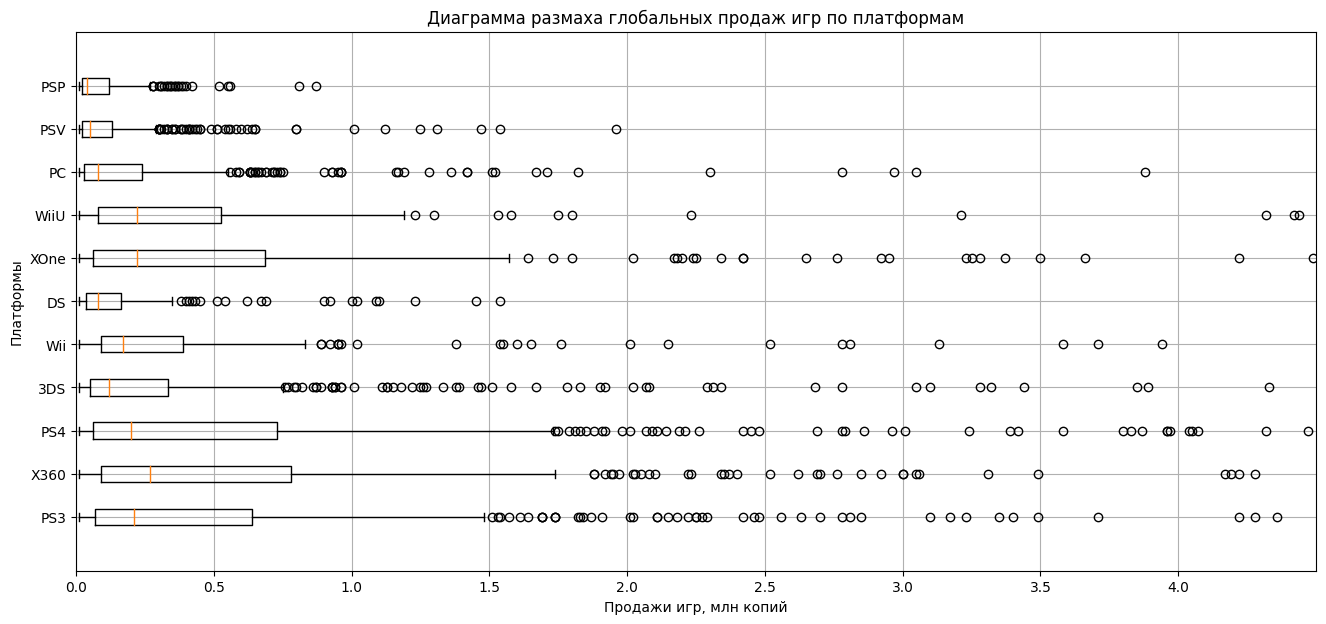

In [41]:
platform_position = 0
for platform in data_actual.platform.unique():
    plt.boxplot(data_actual[data_actual['platform']==platform]['sum_sales'], vert=False, positions=[platform_position])
    platform_position += 0.4
plt.ylabel('Платформы')
plt.yticks(np.arange(0,0.4*len(data_actual.platform.unique()),0.4),data_actual.platform.unique())
plt.xlabel('Продажи игр, млн копий')
plt.xticks(np.arange(0,4.5,0.5))
plt.xlim(0,4.5)
plt.title('Диаграмма размаха глобальных продаж игр по платформам')
plt.show()    

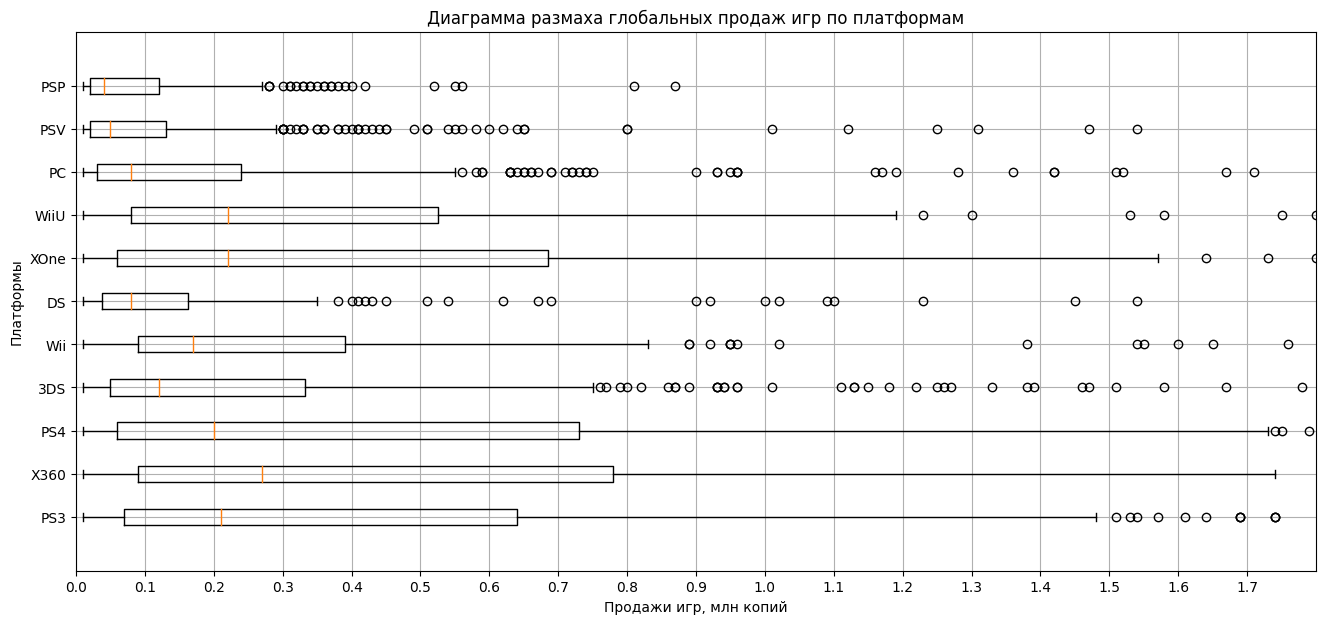

In [42]:
platform_position = 0
for platform in data_actual.platform.unique():
    plt.boxplot(data_actual[data_actual['platform']==platform]['sum_sales'], vert=False, positions=[platform_position])
    platform_position += 0.4
plt.ylabel('Платформы')
plt.yticks(np.arange(0,0.4*len(data_actual.platform.unique()),0.4),data_actual.platform.unique())
plt.xlabel('Продажи игр, млн копий')
plt.xticks(np.arange(0,1.8,0.1))
plt.xlim(0,1.8)
plt.title('Диаграмма размаха глобальных продаж игр по платформам')
plt.show()    

Исходя из построенных диаграмм размаха, можно сделать следующий выводы:

- Почти на каждой платформе есть игры, чьи продажи выбиваются из нормальных значений (выбросы на диаграммах размаха), и которые могут превышать средние продажи игры на платформе во много раз (тем самым обеспечивая спрос на платформу, что называется Killer App)
- Лучше всего за актуальный период продавались игры на платформах WiiU, PS3, Xbox One, лидируют Xbox 360 и PS4 - такой вывод мы делаем на основе предела нормальных значений продаж на платформе
- По средним продажам игры на платформе за актуальный период лидирует Xbox 360, и уже в следующем ряду - PS3, PS4, Xbox One и WiiU

Суммируя, подытожим : на основе проведённого анализа можно говорить о том, что PS4 - самая популярная и потенциально прибыльная платформа за актуальный период.

### Влияние отзывов на продажи

Рассмотрим, как влияют на продажи отзывы пользователей и критиков внутри Playstation 4

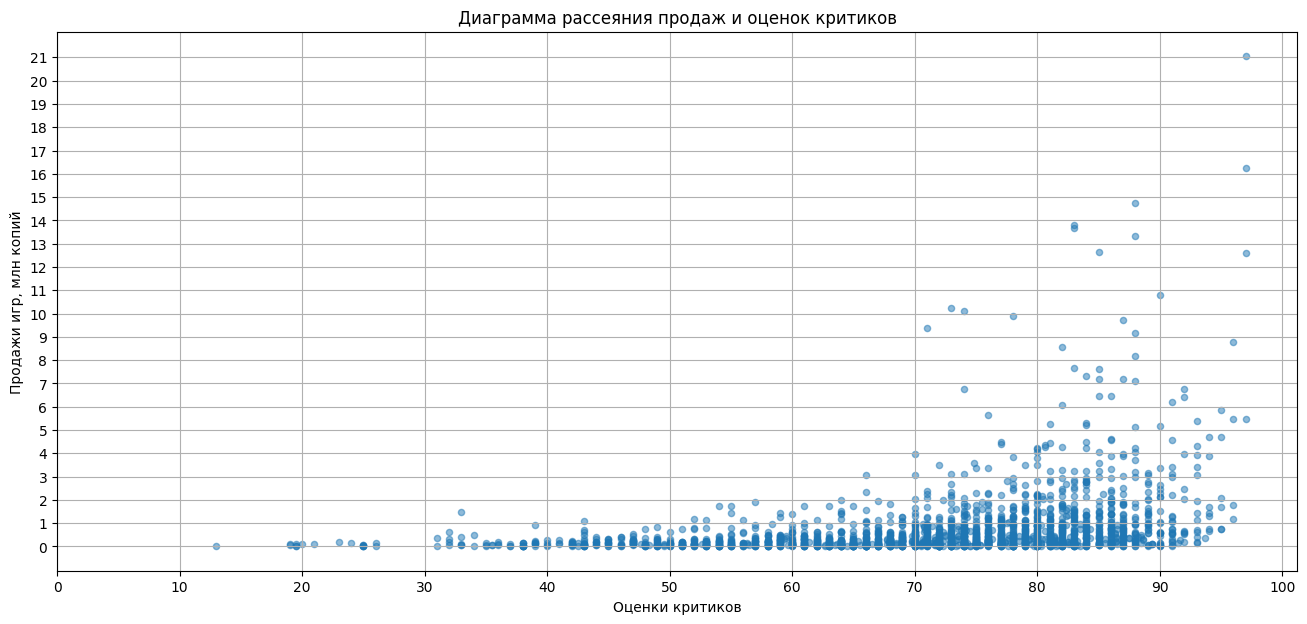

Корреляция продаж игры с оценками критиков: 0.311


In [43]:
data_actual.plot(kind='scatter', x='critic_score', y='sum_sales', style='o', alpha=0.5)
plt.xticks(range(0,110,10))
plt.xlabel('Оценки критиков')
plt.yticks(range(0,22,1))
plt.ylabel('Продажи игр, млн копий')
plt.title('Диаграмма рассеяния продаж и оценок критиков')
plt.show()
print('Корреляция продаж игры с оценками критиков:', data_actual.critic_score.corr(data_actual.sum_sales).round(3))

На основе данного графика и соответствующего расчёта корреляции мы можем говорить о наличии слабой прямой взаимосвязи между оценкой, выставленной игре критиками, и суммарными продажами этой игры

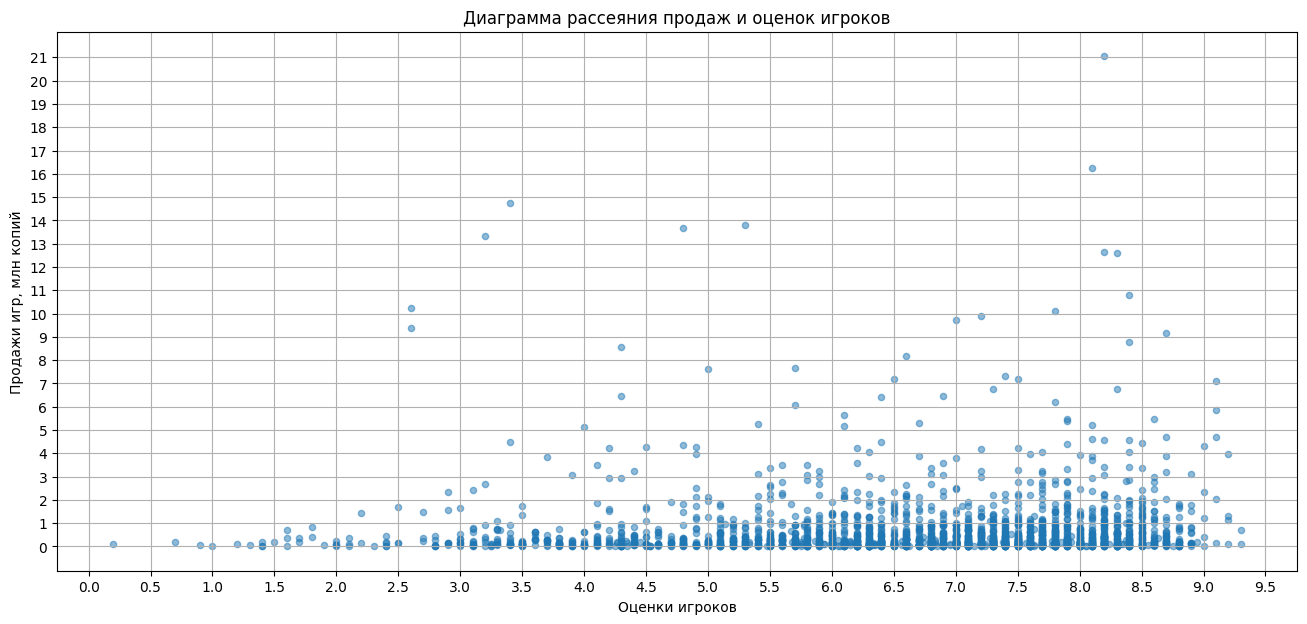

Корреляция продаж игры с оценками игроков: 0.041


In [44]:
data_actual.plot(kind='scatter', x='user_score', y='sum_sales', style='o', alpha=0.5);
plt.xticks(np.arange(0,10,0.5))
plt.xlabel('Оценки игроков')
plt.yticks(range(0,22,1))
plt.ylabel('Продажи игр, млн копий')
plt.title('Диаграмма рассеяния продаж и оценок игроков')
plt.show()
print('Корреляция продаж игры с оценками игроков:', data_actual.user_score.corr(data_actual.sum_sales).round(3))

На основе данного графика и соответствующего расчёта корреляции мы можем говорить практически о полном отсутствии взаимосвязи между оценками игроков и суммарными продажами игр

Рассмотрим кореляции игровых продаж с оценками игроков и критиков на других платформах - удостоверимся в выводах, которые мы сделали о платформе PS4:

In [45]:
corr_user = []
corr_critic = []

for platform in data_actual.platform.unique():
    corr_user.append(
        data_actual[data_actual['platform'] == platform]['user_score']
        .corr(data_actual[data_actual['platform'] == platform]['sum_sales'])
    )
    
for platform in data_actual.platform.unique():
    corr_critic.append(
        data_actual[data_actual['platform'] == platform]['critic_score']
        .corr(data_actual[data_actual['platform'] == platform]['sum_sales'])
    )
    
correlation_data = [corr_user, corr_critic]

In [46]:
corr_table = pd.DataFrame(
    data=correlation_data, index=['Оценки пользователей', 'Оценки критиков'], columns=data_actual.platform.unique()
)

corr_table.style.set_caption("Таблица корреляции оценок с продажами игр").set_table_styles([{
    'selector': 'caption', 'props': [('color', 'black'),('font-size', '16px')]}])

,PS3,X360,PS4,3DS,Wii,DS,XOne,WiiU,PC,PSV,PSP
Оценки пользователей,0.025720,0.044882,-0.021612,0.232309,0.206387,0.368444,-0.094027,0.366882,-0.051055,0.054913,-0.084743
Оценки критиков,0.348597,0.365913,0.391551,0.321612,0.284628,0.263640,0.373990,0.327497,0.307444,0.163692,0.024896


В общем случае мы можем говорить об отсутствии взаимосвязи между оценками пользователей и продажами игр, и весьма слабой взаимосвязи оценок критиков с игровыми продажами.

### Исследование распределения игр по жанрам

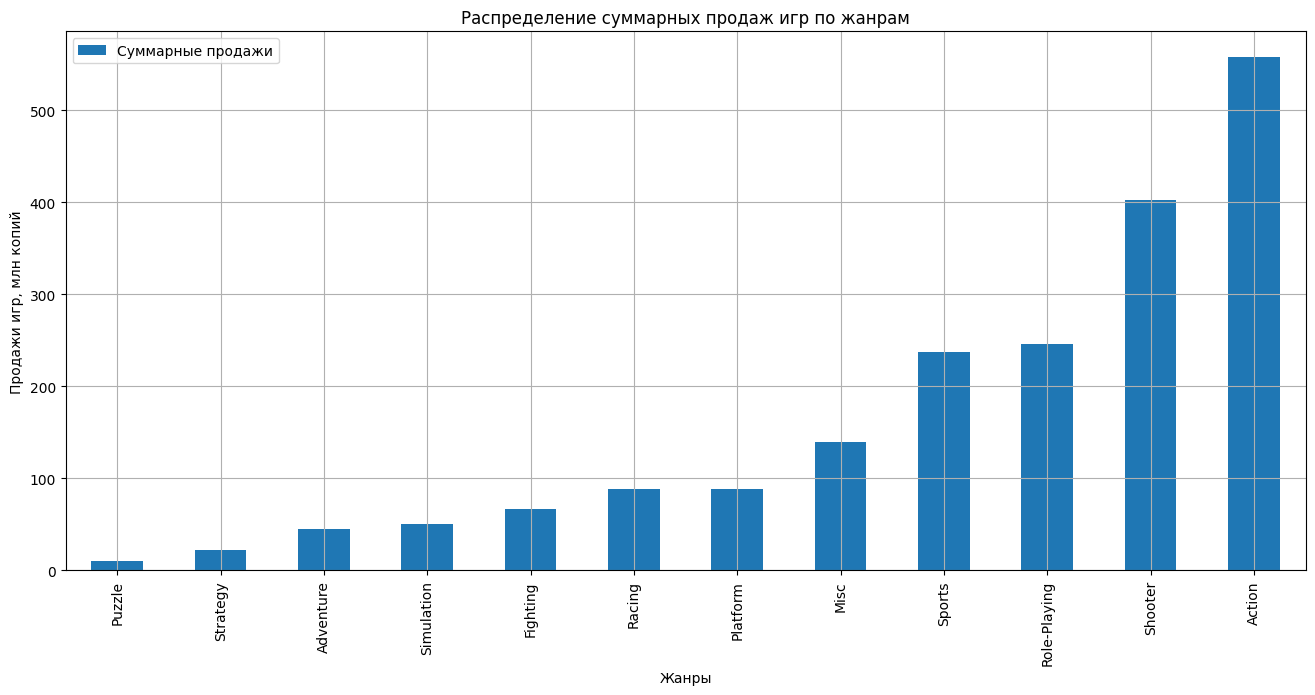

In [47]:
data_actual.pivot_table(index='genre', values='sum_sales', aggfunc='sum') \
                            .sort_values(by='sum_sales').plot(kind='bar')
plt.xlabel('Жанры')
plt.ylabel('Продажи игр, млн копий')
plt.title('Распределение суммарных продаж игр по жанрам')
plt.legend(['Суммарные продажи'])
plt.show()

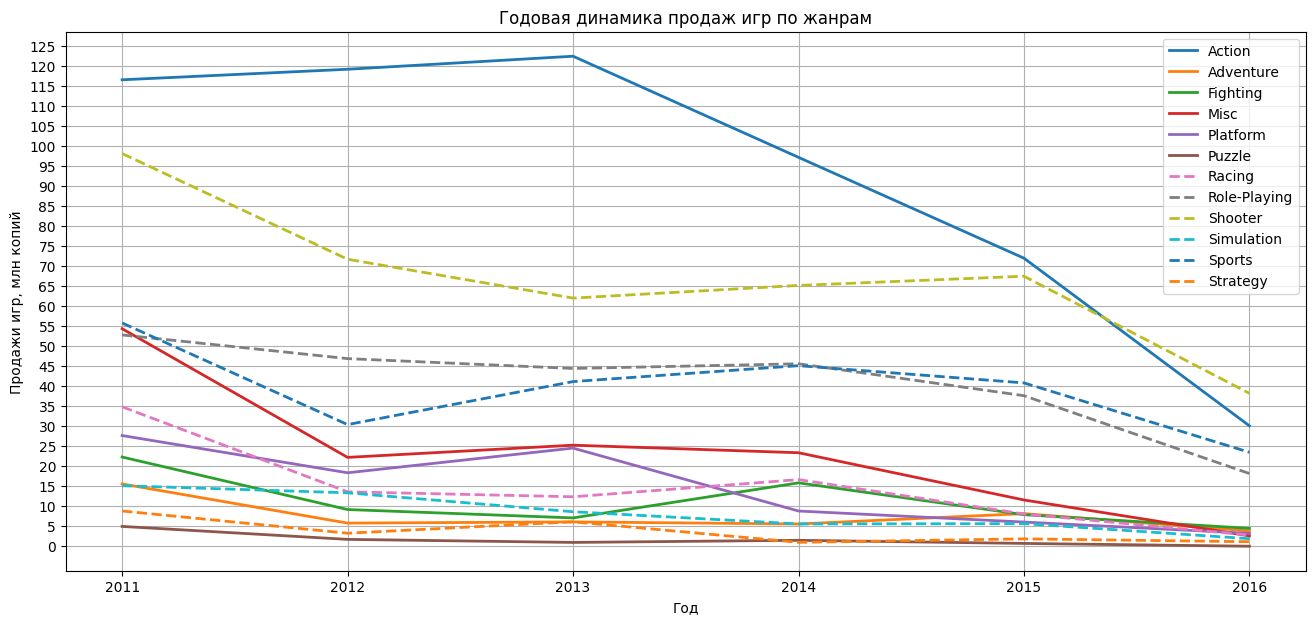

In [48]:
genre_table = data_actual.pivot_table(index='year_of_release', columns='genre', values='sum_sales', aggfunc='sum')
plt.plot(genre_table.loc[:, :'Puzzle'], linewidth=2)
plt.plot(genre_table.loc[:, 'Racing':], linewidth=2, linestyle='dashed')
plt.xlabel('Год')
plt.yticks(range(0,130,5))
plt.ylabel('Продажи игр, млн копий')
plt.title('Годовая динамика продаж игр по жанрам')
plt.legend(genre_table.columns)
plt.show()

На основе построенной столбчатой диаграммы можно говорить о том, что шутеры и экшн-игры являются самыми популярными игровыми жанрами, чьи продажи в полтора и больше раз превышают продаж остальных жанров.

В то же время паззлы и стратегии - достаточно нишевые жанры, спрос на которые в сравнении с другими очень мал.

При рассмотрении суммарных продаж игр по жанрам в динамике можно увидеть падение популярности жанра Action и возрастание в своих позициях относительно него жанра Shooter (по неполным данным 2016-го года можно говорить о том, что в популярности шутеры превзошли экшн). Ролевые и спортивные игры борятся между друг другом за место третьего по популярности жанра, и к 2016-му году эту борьбу выигрывают игры жанра Sport.

## Исследование пользователей по регионам

In [49]:
# Сформируем список интересующих регионов:
region_sales_list = [ 'na_sales', 'eu_sales', 'jp_sales']

### Исследование самых популярных платформ

In [50]:
region_platform = []

for region_sales in region_sales_list:
    
    pivot_platform = (
        data_actual.pivot_table(index='platform', values=region_sales, aggfunc='sum')
        .sort_values(by=region_sales, ascending=False)
    )
    
    pivot_platform['share'] = (pivot_platform[region_sales] / pivot_platform[region_sales].sum()).round(2)
    region_platform.append(pivot_platform)
    
pd.concat([x.reset_index() for x in region_platform], axis=1)

,platform,na_sales,share,platform,eu_sales,share,platform,jp_sales,share
0,X360,226.80,0.27,PS3,163.10,0.24,3DS,100.62,0.41
1,PS3,168.26,0.20,PS4,141.09,0.21,PS3,49.39,0.20
2,PS4,108.74,0.13,X360,117.14,0.17,PSP,24.04,0.10
3,XOne,93.12,0.11,3DS,61.27,0.09,PSV,21.84,0.09
4,3DS,82.65,0.10,PC,56.70,0.08,PS4,15.96,0.06
5,Wii,48.56,0.06,XOne,51.59,0.08,WiiU,13.01,0.05
6,WiiU,38.10,0.05,Wii,29.60,0.04,Wii,8.97,0.04
7,PC,29.88,0.04,WiiU,25.13,0.04,DS,8.04,0.03
8,DS,18.86,0.02,PSV,13.07,0.02,X360,3.35,0.01
9,PSV,12.47,0.02,DS,9.24,0.01,XOne,0.34,0.00


На основе построенной таблицы можно сделать следующие выводы:
- В Японии популярны платформы Японских производителей, таких как Nintendo и Sony. Доля же других игровых платформ (PC, Xbox) на рынке в сравнении с ними ничтожна.
- В Европе предпочитают игровые консоли Sony (PS3, PS4), в отличие от Северной Америки, где суммарная популярность консолей от Microsoft (Xbox 360, Xbox One) немного выше, чем платформ от Sony.
- Также, в Японии больше половины рынка занимают портативные платформы - 3DS, PSP, PSV и др. Портативные консоли существенно менее популярны в Европе и Северной Америке, хотя 3DS остаётся востребованной, и присутствует в топ-5 наиболее популярных игровых платформ.
- Домашние консоли от Nintendo (Wii, WiiU) менее популярны, чем другие домашние консоли, и не входят в топ-5 ни в одном регионе.

### Исследование самых популярных жанров

In [51]:
region_genre = []

for region_sales in region_sales_list:
    
    pivot_genre = (
        data_actual.pivot_table(index='genre', values=region_sales, aggfunc='sum')
        .sort_values(by=region_sales, ascending=False)
    )
    
    pivot_genre['share'] = (pivot_genre[region_sales] / pivot_genre[region_sales].sum()).round(2)
    region_genre.append(pivot_genre)
    
pd.concat([x.reset_index() for x in region_genre], axis=1)

,genre,na_sales,share,genre,eu_sales,share,genre,jp_sales,share
0,Action,230.92,0.28,Action,199.12,0.30,Role-Playing,79.87,0.33
1,Shooter,194.43,0.23,Shooter,148.02,0.22,Action,63.56,0.26
2,Sports,108.62,0.13,Sports,88.39,0.13,Misc,17.60,0.07
3,Role-Playing,83.78,0.10,Role-Playing,62.30,0.09,Fighting,12.38,0.05
4,Misc,69.69,0.08,Racing,40.62,0.06,Platform,12.13,0.05
5,Platform,38.28,0.05,Misc,39.72,0.06,Adventure,12.04,0.05
6,Racing,31.98,0.04,Platform,30.07,0.04,Shooter,11.92,0.05
7,Fighting,31.58,0.04,Simulation,19.72,0.03,Simulation,11.64,0.05
8,Simulation,15.37,0.02,Fighting,16.20,0.02,Sports,11.09,0.05
9,Adventure,14.76,0.02,Adventure,13.96,0.02,Racing,5.64,0.02


На основе построенной таблицы можно сделать следующие выводы:
- Жанровые предпочтения в Европе и Северной Америке очень схожи, их распределение практически идентично друг другу, за некоторыми исключениями: в Европе больше ценят гонки, чем в Северной Америке.
- Иначе выглядят жанровые предпочтения Японии - ролевые игры являются наиболее популярными, и вместе с экшн-играми сильно выбиваются вперёд (более, чем в три раза) по сравнению с другими жанрами. У многих игровых жанров в Японии практически равная аудитория (от файтингов до игр на спортивную тематику)
- Стратегии и паззлы - наименее популярные жанры во всех регионах.

### Исследование влияния рейтинга ESRB на продажи

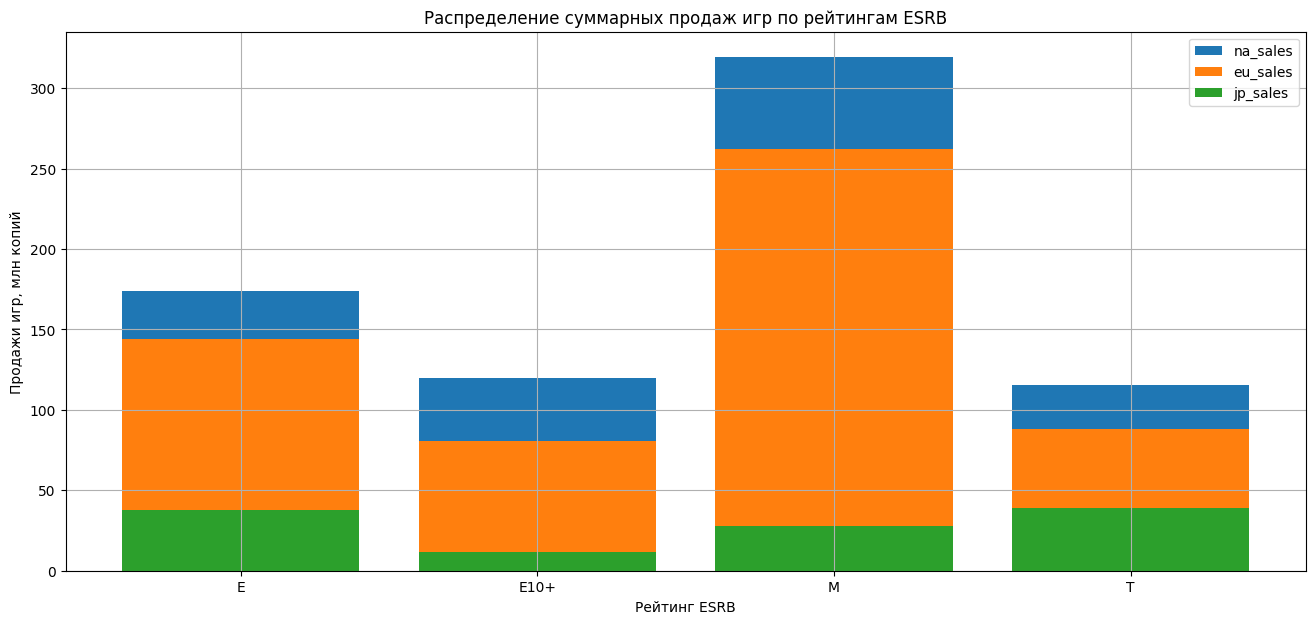

In [52]:
for region_sales in region_sales_list:
    plt.bar(
        x=data_actual.pivot_table(index='rating', values=region_sales, aggfunc='sum').index,
        height=data_actual.pivot_table(index='rating', values=region_sales, aggfunc='sum')[region_sales]
    )
    
plt.title('Распределение суммарных продаж игр по рейтингам ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи игр, млн копий')
plt.legend(region_sales_list, loc='best')
plt.show()    

На основе построенной столбчатой диаграммы можно говорить о том, что в Японии рейтинги ESRB весьма слабо влияют на продажи игр

В Европе и Северной Америке игры с рейтингом M (Mature) имеют большую популярность у потребителя, чем игры, которым был присвоен иной рейтинг. Игры для всей семьи (рейтинг E) также имеют небольшое превосходство перед другими рейтингами (E10+ и T)

## Общий вывод и заключение

После подготовки и предобработки данных, проведения исследовательского и статистического анализов, а также рассмотрения региональных особенностей игровых продаж, были выявлены следующие закономерности, определяющие успешность игры, а также сделаны следующие выводы:

- Целевая игровая платформа - Playstation 4, в меньшей степени - Xbox One
- В общем случае, на игры жанра Shooter и особенно Action всегда имеется большой спрос
- Продажи игры слабо взаимосвязаны с оценками критиков, с оценками пользователей - практически никак
- Если целевой рынок - Европа и Северная Америка, выгодней делать ставку на игры для взрослой аудитории, имеющие соответствующий контент и рейтинг от ESRB (M)
- Если целевой рынок - Япония, выгодней делать ставку на игры для игровых платформ производителей Sony и Nintendo, лучше - портативных, а жанрово отдать предпочтение ролевым играм